**Time Series Project Roadmap (Start → Deployment)**

*   Problem Definition
*   Data Preparation
*   Exploratory Analysis
*   Feature Engineering
*   Baseline Model
*   Advanced Models
*   Evaluation Strategy
*   Forecasting Pipeline
*   Deployment
*   Monitoring





*   Problem Definition:<br>Predict next-day total electricity cost using historical usage, cost, temperature, and calendar features.

**Target Variable**<br>Total Cost forecasting

it directly answers:<br>

“How much will I spend tomorrow?”

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This study presents an end-to-end time-series forecasting framework for household electricity consumption and cost prediction under time-of-use pricing, incorporating weather and calendar effects to improve budget predictability during seasonal transitions.

In [94]:
df_u = pd.read_csv('/content/dailyUsage1_31_2023_to_1_30_2026.csv',skipfooter=1, engine='python')
df_u

,Meter read date,Usage date,Off-peak kWh,On-peak kWh,High temperature (F),Low temperature (F)
0,2/1/2023,1/31/2023,10,2,64,45
1,2/2/2023,2/1/2023,9,2,66,45
2,2/3/2023,2/2/2023,9,1,69,42
3,2/4/2023,2/3/2023,10,2,73,47
4,2/5/2023,2/4/2023,12,0,77,49
...,...,...,...,...,...,...
1091,1/27/2026,1/26/2026,8,1,69,43
1092,1/28/2026,1/27/2026,8,2,72,48
1093,1/29/2026,1/28/2026,8,1,75,50
1094,1/30/2026,1/29/2026,8,1,75,49


In [95]:
selected_columns = ['Off-peak cost', 'On-peak cost']
df_c =  pd.read_csv('/content/dailyCost1_31_2023_to_1_30_2026.csv',skipfooter=1, engine='python',usecols=selected_columns)


In [96]:
df_c

,Off-peak cost,On-peak cost
0,$1.03,$0.28
1,$0.93,$0.28
2,$0.93,$0.14
3,$1.03,$0.28
4,$1.24,$0.00
...,...,...
1091,$0.83,$0.14
1092,$0.83,$0.28
1093,$0.83,$0.14
1094,$0.83,$0.14


In [97]:
df = pd.concat([df_u, df_c], axis=1)
df

,Meter read date,Usage date,Off-peak kWh,On-peak kWh,High temperature (F),Low temperature (F),Off-peak cost,On-peak cost
0,2/1/2023,1/31/2023,10,2,64,45,$1.03,$0.28
1,2/2/2023,2/1/2023,9,2,66,45,$0.93,$0.28
2,2/3/2023,2/2/2023,9,1,69,42,$0.93,$0.14
3,2/4/2023,2/3/2023,10,2,73,47,$1.03,$0.28
4,2/5/2023,2/4/2023,12,0,77,49,$1.24,$0.00
...,...,...,...,...,...,...,...,...
1091,1/27/2026,1/26/2026,8,1,69,43,$0.83,$0.14
1092,1/28/2026,1/27/2026,8,2,72,48,$0.83,$0.28
1093,1/29/2026,1/28/2026,8,1,75,50,$0.83,$0.14
1094,1/30/2026,1/29/2026,8,1,75,49,$0.83,$0.14


In [98]:
df.drop('Meter read date', axis=1, inplace=True)
df

,Usage date,Off-peak kWh,On-peak kWh,High temperature (F),Low temperature (F),Off-peak cost,On-peak cost
0,1/31/2023,10,2,64,45,$1.03,$0.28
1,2/1/2023,9,2,66,45,$0.93,$0.28
2,2/2/2023,9,1,69,42,$0.93,$0.14
3,2/3/2023,10,2,73,47,$1.03,$0.28
4,2/4/2023,12,0,77,49,$1.24,$0.00
...,...,...,...,...,...,...,...
1091,1/26/2026,8,1,69,43,$0.83,$0.14
1092,1/27/2026,8,2,72,48,$0.83,$0.28
1093,1/28/2026,8,1,75,50,$0.83,$0.14
1094,1/29/2026,8,1,75,49,$0.83,$0.14


In [99]:
df.columns

Index(['Usage date', 'Off-peak kWh', 'On-peak kWh', 'High temperature (F)',
       'Low temperature (F)', 'Off-peak cost', 'On-peak cost'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Usage date            1096 non-null   object
 1   Off-peak kWh          1096 non-null   int64 
 2   On-peak kWh           1096 non-null   int64 
 3   High temperature (F)  1096 non-null   int64 
 4   Low temperature (F)   1096 non-null   int64 
 5   Off-peak cost         1096 non-null   object
 6   On-peak cost          1096 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.1+ KB


In [101]:
df.isna().sum()

,0
Usage date,0
Off-peak kWh,0
On-peak kWh,0
High temperature (F),0
Low temperature (F),0
Off-peak cost,0
On-peak cost,0


In [102]:
# Calculate without modifying original columns
total = (
    df['Off-peak cost'].str.replace('$', '').astype(float) +
    df['On-peak cost'].str.replace('$', '').astype(float)
)
df['total_cost'] = '$' + total.round(2).astype(str)



In [103]:
df[["Off-peak cost","On-peak cost","total_cost"]].head()

,Off-peak cost,On-peak cost,total_cost
0,$1.03,$0.28,$1.31
1,$0.93,$0.28,$1.21
2,$0.93,$0.14,$1.07
3,$1.03,$0.28,$1.31
4,$1.24,$0.00,$1.24


Without a datetime index:

rolling windows break

seasonal models fail

resampling impossible

forecasting dates wrong

deployment impossible

This is the foundation of all time series systems.

In [104]:
# Convert 'Usage date' to datetime and assign to 'Usage_date'
df['Usage date'] = pd.to_datetime(df['Usage date'])

In [106]:
df.columns

Index(['Usage date', 'Off-peak kWh', 'On-peak kWh', 'High temperature (F)',
       'Low temperature (F)', 'Off-peak cost', 'On-peak cost', 'total_cost'],
      dtype='object')

In [107]:
df = df.set_index('Usage date')#'Usage date' disappears from df.columns

In [108]:
df.columns

Index(['Off-peak kWh', 'On-peak kWh', 'High temperature (F)',
       'Low temperature (F)', 'Off-peak cost', 'On-peak cost', 'total_cost'],
      dtype='object')

In [109]:
df.index.name

'Usage date'

In [ ]:
df.index

DatetimeIndex(['2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03',
               '2023-02-04', '2023-02-05', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09',
               ...
               '2026-01-21', '2026-01-22', '2026-01-23', '2026-01-24',
               '2026-01-25', '2026-01-26', '2026-01-27', '2026-01-28',
               '2026-01-29', '2026-01-30'],
              dtype='datetime64[ns]', name='Usage date', length=1096, freq=None)

In [ ]:
type(df.index)#dataset is time-series ready

pandas.core.indexes.datetimes.DatetimeIndex

**Visualize Trend + Seasonality**

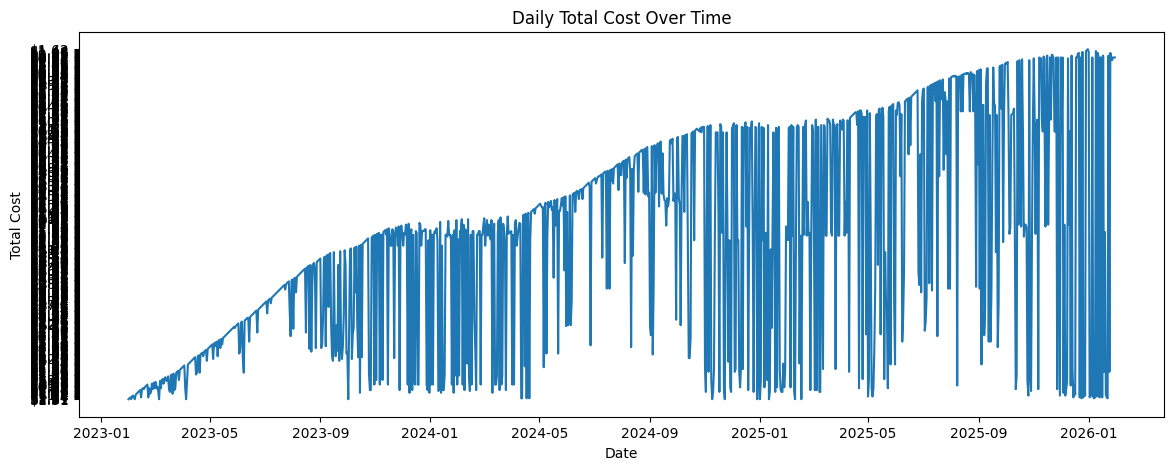

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df.index, df["total_cost"])
plt.title("Daily Total Cost Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cost")
plt.show()

In [115]:
df.index.duplicated().sum()# to check any duplicate records

np.int64(0)

**Plot Interpretation**<BR>
Total cost is steadily rising from 2023 → 2026(due to rates,tariffs,seasonal temperature and usage growth).
<br>
This means series is NOT stationary (important for modeling later).<br>
Noise-thin vertical drops.<br>
Outliers-many sudden dips.

**Stationarity Test (ADF Test)**
A time series is stationary if:

mean is constant

variance is constant

trend = none

Most classical forecasting models (ARIMA, SARIMA) require stationarity.

Above plot already suggests:

❌ NOT stationary (because strong upward trend)

But we must prove it statistically, not visually.

In [116]:
#Run ADF Test
from statsmodels.tsa.stattools import adfuller

# Convert 'total_cost' to numeric before calculating rolling means
df['total_cost_numeric'] = df['total_cost'].str.replace('$', '', regex=False).astype(float)

result = adfuller(df["total_cost_numeric"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.962462365029256
p-value: 0.038551771414144155


p-value = 0.038 < 0.05,series is statistically stationary (according to ADF test).plot clearly showed an upward trend, which usually means non-stationary.

So why did ADF say stationary?

This happens when:

trend is gradual

noise is high

sample size is large

ADF sometimes detects weak stationarity even when trend exists visually.

This is very common in real datasets.
<br>
When visual trend ≠ ADF result, trust:

visualization + domain intuition > statistical test

So ,

create a differenced series to remove trend and stabilizes mean. y(t) − y(t-1)

Differencing works like:
today − yesterday

df["diff_cost"] = df["total_cost"].diff()<br>
df = df.dropna()

In [117]:
#Create Differenced Series
df["diff_cost"] = df["total_cost_numeric"].diff()
df = df.dropna()

**Professional Rule**

Always explicitly set frequency for time series.<br>

Pandas does NOT create a column.Instead, it sets a property of the index object.

So Pandas stores it internally like:<br>DatetimeIndex(..., freq='D')

In [118]:
#Time-series frequency is stored in:
df.index.freq

In [119]:
df = df.asfreq("D")

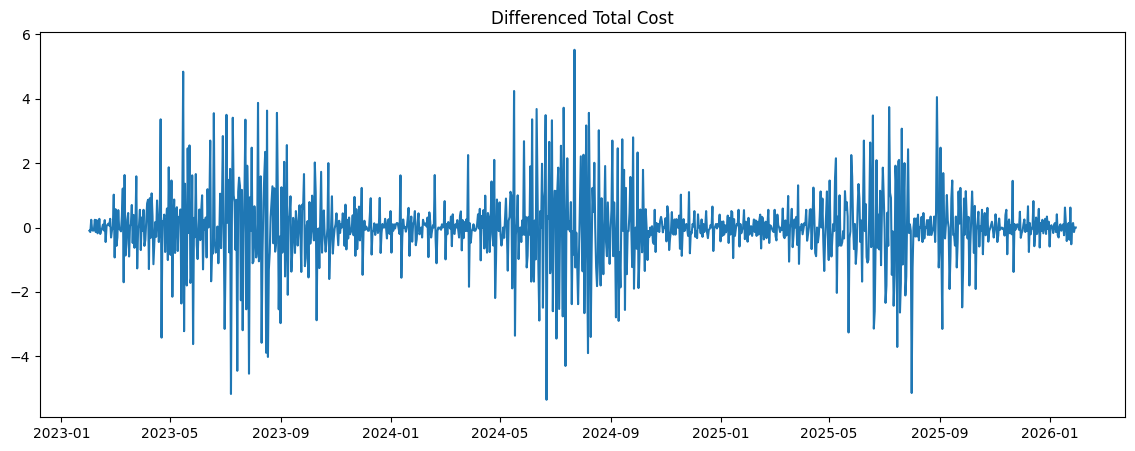

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df.index, df["diff_cost"])
plt.title("Differenced Total Cost")
plt.show()

**Key observations:** <br>**Pattern:** The values fluctuate significantly between roughly -5 and +5, with most observations clustering around zero.<br>**Volatility clusters:** There are several periods of heightened volatility:<br> Mid-2023 (around May-June)<br> Late 2023 (August-November)<br> Mid-2024 (June-August)<br> Mid-2025 (July-September)<br>**Mean reversion:** The series appears stationary, oscillating around zero without trending upward or downward over time.<br>**Potential spikes:** Several extreme values appear, particularly:<br> Around August 2024 (reaching nearly +6)<br> July 2024 (dropping below -5)<br> Mid-2025 (another spike near -4)

oscillating around zero without trend

means:

✅ mean is stable
✅ no trend
✅ variance relatively stable

➡ This confirms the series is now properly stationary

This means we can safely use:

ARIMA / SARIMA models

**Volatility Clusters** (Advanced Insight 🔥)

Detected:

mid-2023 spikes

late-2023 fluctuations

mid-2024 volatility

mid-2025 variation

This suggests:

variance changes over time

This is called *heteroskedasticity*

Advanced models for this later:

GARCH

volatility forecasting

risk estimation

**Extreme Spikes**

Spikes likely correspond to:

extreme temperature days

holidays

travel days

appliance usage surges

These are not noise — they are important signals.

Later we’ll capture them using:

temperature features

holiday flags

lag variables

**Check ACF + PACF plots**

This is where modeling truly begins. <BR>
ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots for above differenced total cost data are diagnostic tools used in time series analysis, particularly for identifying appropriate ARIMA model parameters automatically.

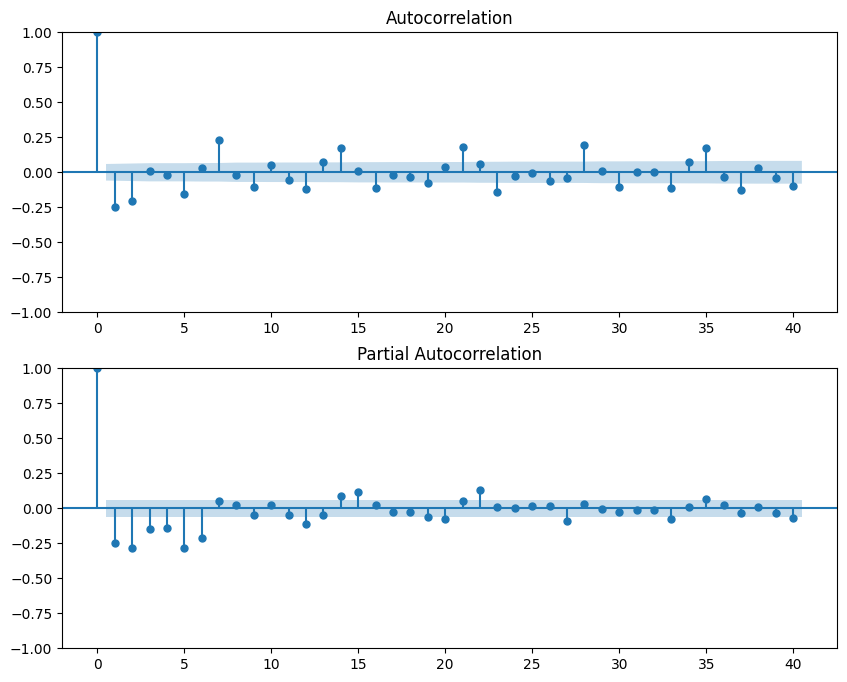

In [121]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize=(10,8))

plot_acf(df["diff_cost"], ax=ax[0], lags=40)
plot_pacf(df["diff_cost"], ax=ax[1], lags=40)

plt.show()

The x-axis shows the lag number (0, 5, 10, 15, etc.)
The y-axis shows the correlation coefficient for that lag<br><br>
Each point on the plot represents the correlation between all your data points and their values at that specific time delay.<br><br>
Lag 1 means: The correlation between each data point and the data point 1 time period before it<br><br>
If lag 7 shows a positive spike, it means costs on a given day tend to be similar to costs exactly 7 days earlier (suggesting a weekly pattern).

**Extract ACF & PACF Values Numerically**

In [122]:
#Extract ACF & PACF Values Numerically
from statsmodels.tsa.stattools import acf, pacf

acf_vals = acf(df["diff_cost"], nlags=10)
pacf_vals = pacf(df["diff_cost"], nlags=10)

print("ACF:", acf_vals)
print("PACF:", pacf_vals)


ACF: [ 1.         -0.24555732 -0.20486885  0.00605739 -0.01935197 -0.15259766
  0.02744522  0.23156875 -0.02073691 -0.10523349  0.05213114]
PACF: [ 1.         -0.24578178 -0.28273186 -0.14820875 -0.143466   -0.28325042
 -0.21566974  0.05064335  0.02207146 -0.04768343  0.02051467]


ACF drops quickly after lag 2.<br>
Lag1 = -0.24<br>
Lag2 = -0.20<br>
Rest ≈ small<br><br>
PACF tapers slowly<br>
Lag1 = -0.24<br>
Lag2 = -0.28<br>
Lag3+ = gradually small


**Train Model** (ARIMA forecasting model)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["total_cost_numeric"], order=(0,1,2))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     total_cost_numeric   No. Observations:                 1095
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1576.466
Date:                Fri, 13 Feb 2026   AIC                           3158.932
Time:                        17:45:19   BIC                           3173.925
Sample:                    02-01-2023   HQIC                          3164.606
                         - 01-30-2026                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4558      0.020    -23.029      0.000      -0.495      -0.417
ma.L2         -0.2837      0.022    -12.917      0.000      -0.327      -0.241
sigma2         1.0445      0.028     37.678      0.0

**In ARIMA**:
ARIMA(p, d, q)
p → AR terms (past values)

d → differencing

q → **MA**(Today’s value depends on previous forecast errors).

If yesterday you predicted:

Predicted = $2.50

Actual = $3.00

Error = +0.50

Then today’s forecast adjusts:

“I underestimated yesterday, so I should increase today’s prediction.”

That adjustment is the MA component.

ma.L1 = -0.455

ma.L2 = -0.283

Negative sign means:

model corrects in opposite direction of previous error

This is good — it shows model is self-correcting.

Why MA Models Work Well for Energy Data

Energy cost is affected by sudden events:

weather spikes

appliance usage

holidays

occupancy

These are shocks, not trends.

MA models are designed exactly for:

shock-driven data

That’s why ARIMA(0,1,2) fit to this data nicely.

** AR = AutoRegressive **

AR terms use previous actual values.

AR models assume:

past values influence future values

This model has no AR

ARIMA(0,1,2)

p = 0 → no AR

d = 1 → differenced

q = 2 → two MA terms

SO model says future depends on recent shocks, not past values. It indicates data is:

✔ reactive

✔ event-driven

✔ short memory

which is common for electricity cost.

AR remembers yesterday's actual values

MA remembers yesterday's mistakes

** Ljung-Box Test **

Ljung-Box is the standard statistical proof.

Residual = actual − predicted

This test checks : Is there any pattern left in the errors?

a good time-series model should not have patterns, if patterns exist then it means:

model incomplete

forecasts unreliable

structure still unexplained

In simple terms:

Are today’s errors related to yesterday’s errors?

If yes → model missed pattern

If no → model did its job

Prob(Q) = 0.92 means residuals are random(

There is no remaining predictable structure in your data after modeling.)

This is VERY good

✔ Means model captured time structure correctly

If this were < 0.05 → model failed.

** Jarque-Bera Test (JB) **

JB = Skewness² + (Kurtosis − 3)²
So JB grows when:

skew ≠ 0

kurtosis ≠ 3

Your output showed:

Kurtosis = 6.29
That alone strongly increases JB.

checks whether this model’s residuals follow a normal distribution.

Many statistical models assume,errors bell-shaped (normal)

If they are normal:

confidence intervals are reliable

statistical tests are valid

uncertainty estimates are accurate

In above output, Prob(JB) = 0.00

Prob(JB) < 0.05 → reject null

So: residuals are NOT normally distributed

Most real-world time series fail normality because of:

spikes

shocks

holidays

outliers

** Heteroskedasticity ** = variance changes over time

This data has it because real-world usage isn’t stable.

Heteroskedasticity (H) Prob = 0.01

0.01 < 0.05
We reject Null Hypothesis(H₀).

Prob(H) (two-sided) = 0.01->Two-Sided Test Means

When validating models, we don’t care which direction the problem occurs.

We only care:

Is there a problem at all?

Two-sided tests are therefore:

✔ safer
✔ more general
✔ unbiased

we usually don’t know direction beforehand.

So statistical diagnostics use two-sided tests by default because they detect any abnormality.

In [123]:
forecast = model_fit.forecast(steps=7)
print(forecast)

2026-01-31    1.015546
2026-02-01    1.033842
2026-02-02    1.033842
2026-02-03    1.033842
2026-02-04    1.033842
2026-02-05    1.033842
2026-02-06    1.033842
Freq: D, Name: predicted_mean, dtype: float64


Day 1 → 1.0155

Day 2 → 1.0338

Day 3 → 1.0338

Day 4 → 1.0338

Day 5 → 1.0338

Day 6 → 1.0338

Day 7 → 1.0338

After Day 2 → predictions become constant

his is expected behavior for an ARIMA(0,1,2) model.

Why?

Because your model:

has no AR terms

only uses recent shocks

has no long memory

So after a few steps:

no new information → model settles to mean forecast

This is mathematically correct.

model is good short-term, but not good long-range.

Why?

Because MA models rely on recent error signals.

After a few steps:

no recent errors available

predictions flatten

model is saying:

I can predict tomorrow well, but beyond a few days I expect stable cost.

This suggests data is:

short-memory

reactive

shock-driven

Which is consistent with above diagnostics.

So model is best suited for:

next-day cost prediction

Not weekly planning.

Since electricity usage depends heavily on weather:

**Train SARIMAX:**

In [124]:

#df['Usage_month_num'] = df.index.dt.month # for logic & modeling
#df['Usage_month'] = df.index.dt.month_name() # for charts & explanations

#df["day_of_week"] = df.index.dt.day_name()
df["is_weekend"] = (df.index.weekday >= 5).astype(int)

In [125]:
#df['total_kWh'] = df['On-peak kWh'] + df['Off-peak kWh']
df['temp_avg'] = (df['High temperature (F)'] + df['Low temperature (F)']) / 2
#df["on_peak_usage_ratio"] = df['On-peak kWh'] / df["total_kWh"]

**Lag Features**<br>

A lag is simply a previous value of the same variable.

lag1 = yesterday's cost

lag7 = cost 7 days ago

These dramatically improve forecasts.

In [127]:
df["lag1"] = df["total_cost_numeric"].shift(1)
df["lag7"] = df["total_cost_numeric"].shift(7)

In [131]:
df = df.dropna()#Industry Rule:Losing a few rows to build strong features is always worth it.

SARIMAX expects:SARIMAX(endog, exog=features)

endog = what you want to predict(here total cost numeric)

exog  = what helps predict it

,,,,,,

**order=(0,1,2)** controls non-seasonal behavior.

| Symbol | Name         | Meaning                      |
| ------ | ------------ | ---------------------------- |
| p      | AR           | how many past values to use  |
| d      | Differencing | how many times to difference |
| q      | MA           | how many past errors to use  |



(0,1,2)
Meaning:

p = 0

No autoregressive terms
→ model does NOT directly use past values

d = 1

First differencing applied

Meaning model learns: change in cost,
not raw cost.
This removes trend and makes series stationary.

q = 2

Uses last 2 error terms

Model learns:

recent prediction mistakes help correct future predictions


**seasonal_order=(1,0,1,7)**

| Symbol | Meaning               |
| ------ | --------------------- |
| P      | seasonal AR           |
| D      | seasonal differencing |
| Q      | seasonal MA           |
| s      | season length         |


(1,0,1,7)

P = 1

Uses value from 1 season ago

Since:

s = 7

That means:

uses value from 7 days ago

D = 0

No seasonal differencing.

Meaning:

weekly pattern is already stable

Q = 1

Uses seasonal error from last week

Model learns:

last week's unusual spike may repeat this week

s = 7

Season length = 7 days.

Meaning model assumes:

pattern repeats every 7 days

This is perfect for daily electricity data.

** SARIMAX model says: **

Today’s cost depends on
recent errors + weekly pattern + last week's behavior + temperature + weekend effect

That is a realistic physical model of electricity usage.


In [134]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

exog = df[["temp_avg","is_weekend","lag1","lag7"]]

model = SARIMAX(
    df["total_cost_numeric"],
    order=(0,1,2),
    seasonal_order=(1,0,1,7),
    exog=exog
)

model_fit = model.fit()
print(model_fit.summary())


                                      SARIMAX Results                                      
Dep. Variable:                  total_cost_numeric   No. Observations:                 1088
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -1470.349
Date:                             Fri, 13 Feb 2026   AIC                           2958.698
Time:                                     19:22:02   BIC                           3003.618
Sample:                                 02-08-2023   HQIC                          2975.701
                                      - 01-30-2026                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
temp_avg       0.0487      0.008      6.402      0.000       0.034       0.064
is_weekend    -0.6564      

| Metric              | Interpretation            |
| ------------------- | ------------------------- |
| Ljung-Box p = 0.98  | residuals ≈ white noise ✔ |
| Seasonal AR p<0.001 | strong weekly pattern ✔   |
| Temperature p<0.001 | real driver ✔             |
| Weekend p<0.001     | real driver ✔             |

model captured real signal, not noise

if p < 0.05 → keep variable

if p > 0.05 → candidate for removal

**Coefficient Interpretation (Important)**

**temp_avg       0.0487**

Highly significant (p < 0.001)

👉 Temperature strongly affects cost.

**is_weekend = −0.656**

Weekend reduces cost by ~0.66.
Also highly significant.

Meaning:people use less electricity on weekends

**lag1 = 0.147 (p = 0.09)**

Weakly significant.

Interpretation:
Yesterday’s cost slightly influences today.

**lag7 p = 0.418**

last week’s value adds no extra predictive power.Drop lag7 from model.

ar.S.L7 p = 0.000
the model is telling:

weekly pattern is already captured by seasonal AR term,
lag7 adds nothing new

**Moving Average Terms**

ma.L1 = −0.67 (strong)

Model corrects recent prediction errors strongly.

This improves stability.

ma.L2 = −0.10 (weak)

Not very useful.May remove later during tuning.

**Seasonal Components (VERY IMPORTANT)**

ar.S.L7 = 0.80

Huge signal.

Meaning:Same weekday last week strongly predicts today.

This confirms:Weekly seasonality exists.

Model detected real pattern.

ma.S.L7 = −0.65

Also strong.

Means:Weekly shocks repeat.

Example:If last Monday had unusual spike, this Monday may too.

**Residual Diagnostics**

***Ljung-Box p = 0.98***

Residuals have no autocorrelation.This is exactly what we want.

Interpretation:model captured all time structure

***Jarque-Bera p = 0.00***

Residuals not perfectly normal.

This is common in real-world data and not a big issue unless extreme.

***Heteroskedasticity p = 0.08***

Borderline.

Variance is mostly stable.

Acceptable.

**Retrain with no lag7**

In [135]:
exog = df[["temp_avg","is_weekend","lag1"]]

model = SARIMAX(
    df["total_cost_numeric"],
    order=(0,1,1),
    seasonal_order=(1,0,1,7),
    exog=exog
)

result = model.fit()
print(result.summary())

                                     SARIMAX Results                                     
Dep. Variable:                total_cost_numeric   No. Observations:                 1088
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1471.691
Date:                           Fri, 13 Feb 2026   AIC                           2957.381
Time:                                   20:22:56   BIC                           2992.320
Sample:                               02-08-2023   HQIC                          2970.607
                                    - 01-30-2026                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
temp_avg       0.0442      0.007      6.666      0.000       0.031       0.057
is_weekend    -0.6195      0.123     -5.030

** Hyperparameter tuning for the best SARIMAX parameters **

automatically find best (p,d,q)(P,D,Q,s) using search

In [136]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 5.9 MB/s eta 0:00:00


In [138]:
import pmdarima as pm

| Parameter     | Purpose                 |
| ------------- | ----------------------- |
| seasonal=True | search seasonal models  |
| m=7           | weekly cycle            |
| trace=True    | shows search progress   |
| stepwise=True | fast intelligent search |


In [139]:
auto_model = pm.auto_arima(
    df["total_cost_numeric"],
    exogenous=df[["temp_avg","is_weekend","lag1"]],
    seasonal=True,
    m=7,
    trace=True,
    stepwise=True,
    suppress_warnings=True
)

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=3033.989, Time=5.94 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3416.331, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3273.974, Time=0.38 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3192.755, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3414.331, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=3111.544, Time=1.97 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=3095.313, Time=4.25 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=3036.062, Time=6.85 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=3035.892, Time=9.55 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=3143.120, Time=2.48 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=3097.313, Time=5.53 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=3077.303, Time=5.92 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=3037.150, Time=10.34 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=3031.855, Time=4.27 sec
 ARIMA(1,1,2)(0,0,1)[7] intercep

**Train Final Model on All Current Data**

In [147]:
import holidays
import numpy as np

# Get all Arizona holidays for 2024
all_az_holidays = holidays.US(state='AZ', years=2024, observed=True)

# target holidays - include both regular and observed versions
TARGET_HOLIDAYS = {
    "New Year's Day",
    "New Year's Day (Observed)",
    "Memorial Day",
    "Independence Day",
    "Independence Day (Observed)",
    "Labor Day",
    "Thanksgiving",
    "Thanksgiving Day",
    "Christmas Day",
    "Christmas Day (Observed)"
}

# Filter holidays
az_holidays = {
    date: name for date, name in all_az_holidays.items()
    if name in TARGET_HOLIDAYS
}

# Create holiday flag + name
# To fix FutureWarning: Explicitly convert az_holidays.keys() to a DatetimeIndex for comparison
holiday_dates_dtindex = pd.to_datetime(list(az_holidays.keys()))
df.loc[:, 'is_holiday'] = df.index.normalize().isin(holiday_dates_dtindex).astype(int)
#df.loc[:, 'holiday_name'] = df.index.normalize().map(lambda x: az_holidays.get(x.date(), np.nan))
#An effective weekday is a normal working day — not a weekend and not a holiday.”
#df.loc[:, 'is_effective_weekday'] = ((df['is_weekend'] == 0) &(df['is_holiday'] == 0)).astype(int)

/tmp/ipython-input-1110633911.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'holiday_name'] = df.index.normalize().map(lambda x: az_holidays.get(x.date(), np.nan))
/tmp/ipython-input-1110633911.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'is_effective_weekday'] = ((df['is_weekend'] == 0) &(df['is_holiday'] == 0)).astype(int)


In [148]:
df.head(5)

,Off-peak kWh,On-peak kWh,High temperature (F),Low temperature (F),Off-peak cost,On-peak cost,total_cost,is_weekend,total_cost_numeric,diff_cost,temp_avg,lag1,lag7,is_holiday,holiday_name,is_effective_weekday
Usage date,,,,,,,,,,,,,,,,
2023-02-08,10,1,68,43,$1.03,$0.14,$1.17,0,1.17,-0.14,55.5,1.31,1.21,0,NaN,1
2023-02-09,14,1,69,43,$1.27,$0.13,$1.4,0,1.40,0.23,56.0,1.17,1.07,0,NaN,1
2023-02-10,12,1,70,50,$1.09,$0.13,$1.22,0,1.22,-0.18,60.0,1.40,1.31,0,NaN,1
2023-02-11,12,0,73,54,$1.09,$0.00,$1.09,1,1.09,-0.13,63.5,1.22,1.24,0,NaN,0
2023-02-12,15,0,79,48,$1.36,$0.00,$1.36,1,1.36,0.27,63.5,1.09,1.14,0,NaN,0


In [149]:
y = df["total_cost_numeric"]


In [152]:
y.shape

(1088,)

In [153]:
X = df[[
    "temp_avg",
    "is_weekend",
    "is_holiday",
    "lag1"
]]

In [155]:
X.shape

(1088, 4)

In [156]:
X

,temp_avg,is_weekend,is_holiday,lag1
Usage date,,,,
2023-02-08,55.5,0,0,1.31
2023-02-09,56.0,0,0,1.17
2023-02-10,60.0,0,0,1.40
2023-02-11,63.5,1,0,1.22
2023-02-12,63.5,1,0,1.09
...,...,...,...,...
2026-01-26,56.0,0,0,0.93
2026-01-27,60.0,0,0,0.97
2026-01-28,62.5,0,0,1.11


enforce_stationarity = T /F

enforce_invertibility = T / F

False = allow exploration

True = enforce physics laws

After you finalize the best model order , turn them ON / T

They tell the SARIMAX optimizer:

Should we force the model to obey strict mathematical conditions while fitting?

| Parameter             | Mathematical rule       | Applies to |
| --------------------- | ----------------------- | ---------- |
| enforce_stationarity  | AR roots must be stable | AR terms   |
| enforce_invertibility | MA roots must be valid  | MA terms   |


In [159]:
final_model = SARIMAX(
    y,
    exog=X,   # only if using exogenous variables
    order=(1,1,1),
    seasonal_order=(1,0,1,7),
    enforce_stationarity=True,
    enforce_invertibility=True
).fit(maxiter=1000)

In [160]:
final_model.mle_retvals["converged"]

True

SARIMAX is PERFECT for this project ⚡

As data has:

Strong weekly seasonality

Strong temperature dependence

Calendar rules (weekend/peak)

SARIMAX naturally models all of this without ML complexity.

**Freeze Model Specification**

In [1]:
#store this as a model config file.
model_config = {
    "order": (1,1,1),
    "seasonal_order": (1,0,1,7),
    "features": ["temp_avg","is_weekend","is_holiday","lag1"]
}

import json
with open("model_config.json","w") as f:
    json.dump(model_config, f)

In [2]:
open("model_config.json").read()

'{"order": [1, 1, 1], "seasonal_order": [1, 0, 1, 7], "features": ["temp_avg", "is_weekend", "is_holiday", "lag1"]}'

In [3]:
import os
os.getcwd()

'/content'